<a href="https://colab.research.google.com/github/Lustiyana/Digital_Image_Processing/blob/main/Damage_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

from google.colab import files

In [ ]:
def image_read(image1, image2, title1="", title2=""):
  fig = plt.figure(figsize = (15, 15))
  ax1 = fig.add_subplot(121)
  ax1.imshow(image1, cmap="gray")
  ax1.set(xticks = [], yticks = [], title = title1)
  ax2 = fig.add_subplot(122)
  ax2.imshow(image2, cmap="gray")
  ax2.set(xticks = [], yticks = [], title = title2)

In [ ]:
uploaded = files.upload()

Saving hp_3.jpeg to hp_3.jpeg


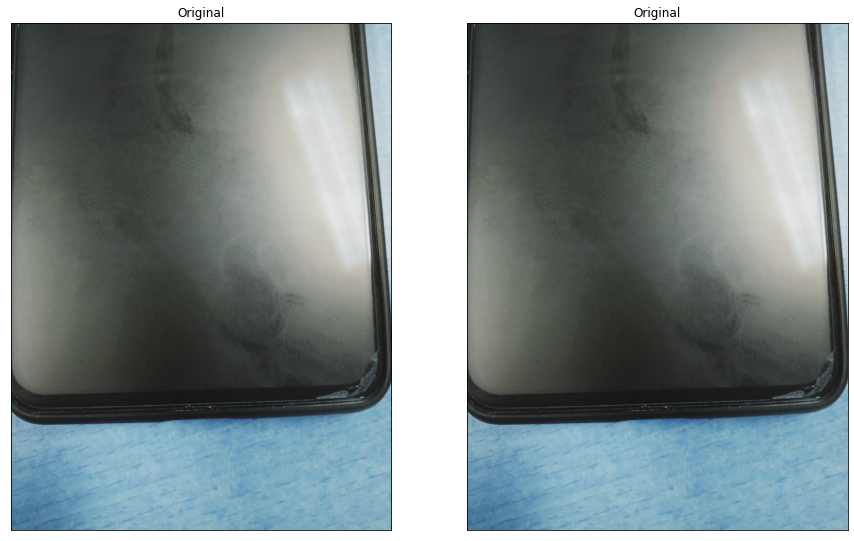

In [ ]:
image = cv2.imread('hp_3.jpeg')
plot_image = image_read(image, image, title1 = "Original", title2 = "Original")

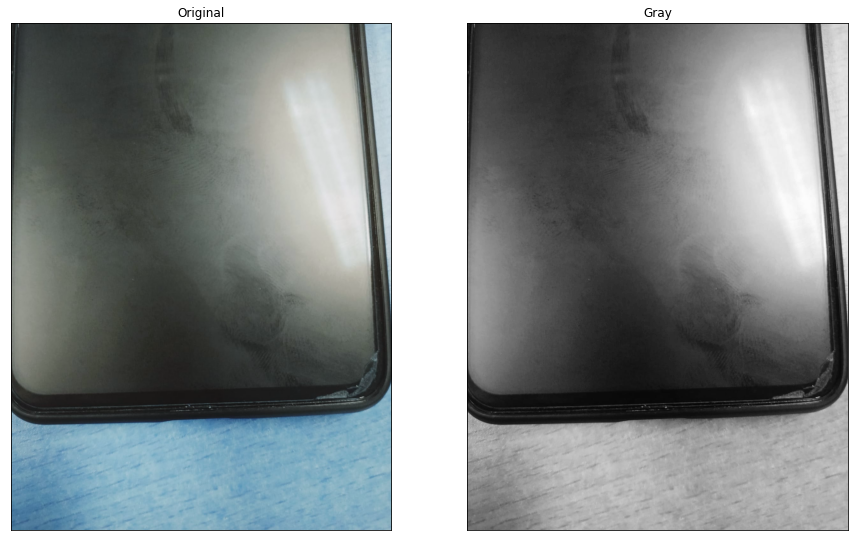

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

image_read(image, gray, title1 = "Original", title2="Gray")

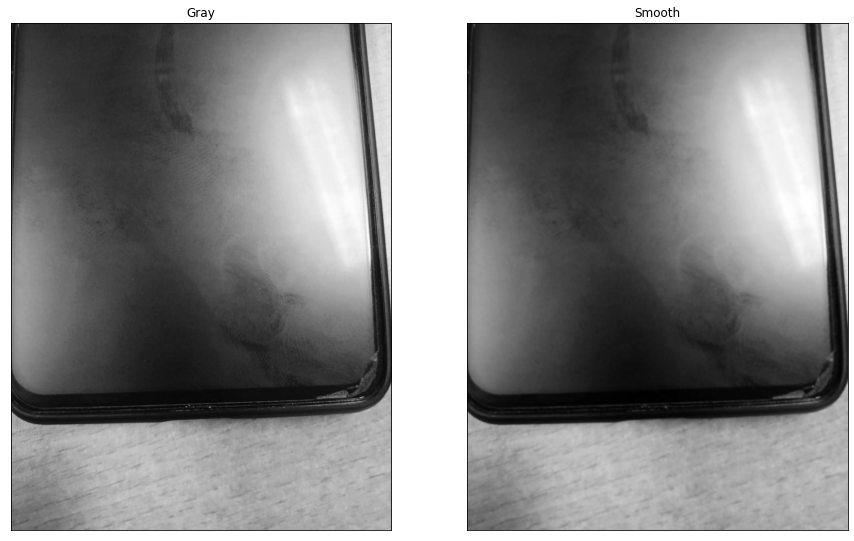

In [ ]:
smooth = cv2.bilateralFilter(gray, 9, 75, 75)

image_read(gray, smooth, title1 ="Gray", title2 ="Smooth")

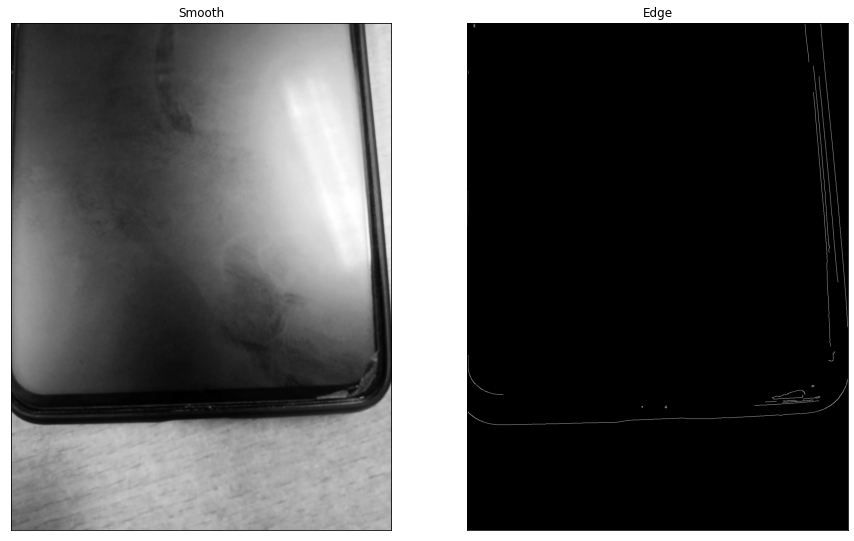

In [ ]:
edge = cv2.Canny(smooth, 50, 100)
image_read(smooth, edge, title1="Smooth", title2 = "Edge")

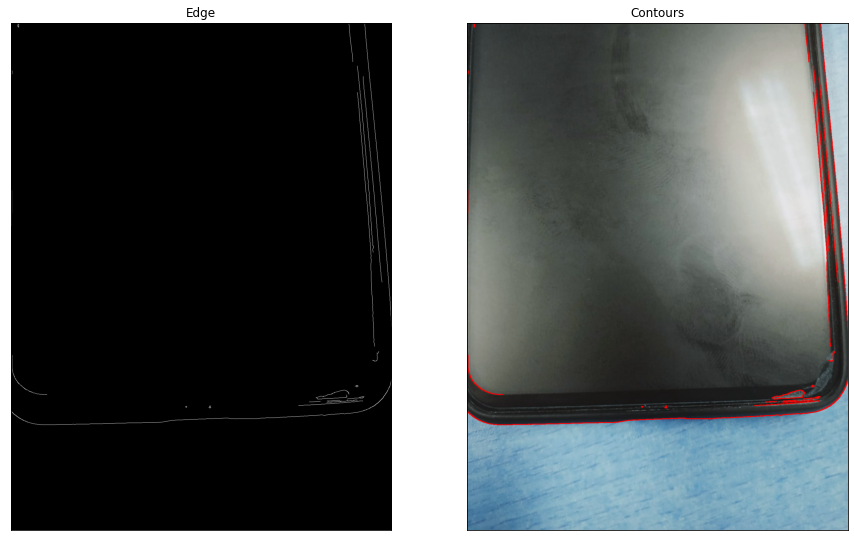

In [ ]:
contours, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()

_ = cv2.drawContours(image_copy, contours, -1, (255, 0, 0), 2)

image_read(edge, image_copy, title1="Edge", title2="Contours")

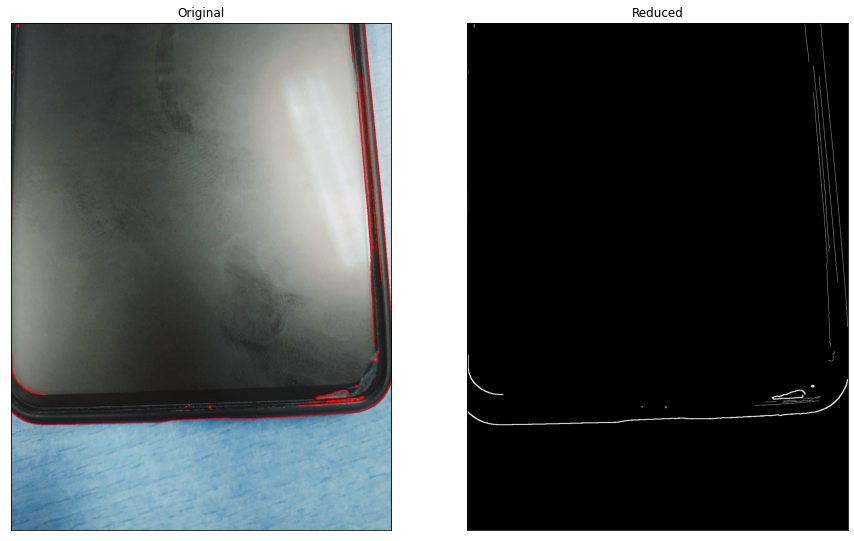

In [ ]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

image_reduced = edge.copy()
_ = cv2.drawContours(image_reduced, contours, -1, (255, 0, 0), 2)

image_read(image_copy, image_reduced, title1 = "Original", title2 = "Reduced")

In [ ]:
damage = None

for i in contours:
    a = cv2.arcLength(i, True)
    edge_count = cv2.approxPolyDP(i, 0.05 * a, True)
    if len(edge_count) == 4:
        x, y, w, h = cv2.boundingRect(i)
        damage = image[y:y+h, x:x+w]
        break

cv2.imwrite("damage.jpeg", damage)

True

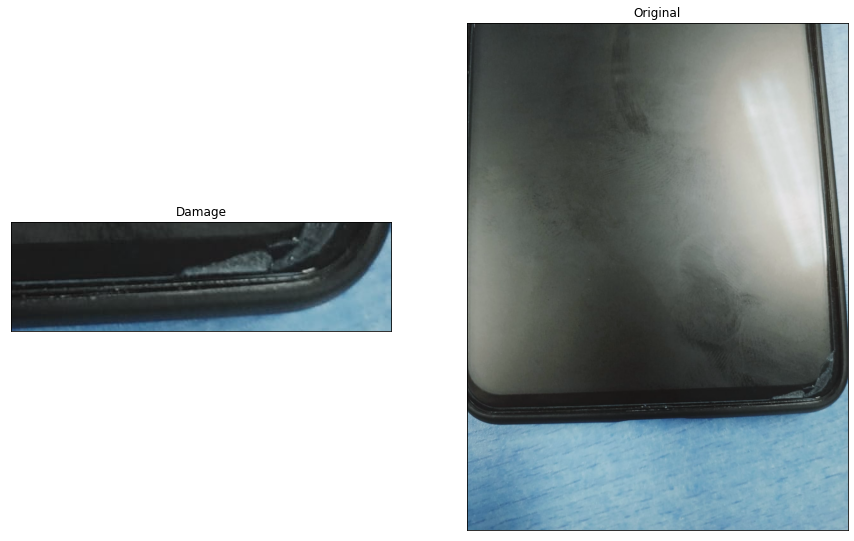

In [ ]:
image_read(damage, image, title1 = "Damage", title2 = "Original")